## *AT THE END OF THE PROJECT, MAKE SURE TO COMPILE ALL DATASETS TOGETHER, ALL VARIABLES IN LINE AGAINST TIME*

First step to establish a dataset with a lot of variables for future climate analysis
accessibility of sustainability data in one place



# The Project Aim - To Visualise India Emissions and Fossil Fuel Use and then Predict Changes in the Next 50 Years
### Possible Extension - Use the change in trends to then predict India's future temperature changes

To do this, we will use [number of overall] datasets. 

The first will be a historical emissions dataset provided by Postdam Institute For Climate Impact Research (PIK), and a fossil fuel ___ provided by ___. 

This project is not aimed to use highly complex prediction algorithms or methods at the moment. Conversely, there is more a focus on
    a) To source and validate data with general trends reported in the literature
    b) To provide a range of visualisation to clearly convey information for policy makers
    c) To generate a general prediction model for ease of visibility and speed. 
    
If these objectives are achieved without significant challenges, then the opportunity to use more advanced techniques (e.g. K-Nearest Neighbour, Neural Net etc.) to increase the accuracy and confidence in prediction models. 

It will also enable the project to be extended even further by correlating current trends in emissions and fossil fuel use with temperature and precipitation to provide some prediction for climatic forecasts.

This correlation will hope to predict changes in India's energy mix over the next 50 years based upon current trends, and will also predict the changes in mean annual terrestrial temperature over the same time period. 

To make this project valuable to policymakers, both a general and highly optimised prediction model will be created - general trend models are, arguably, more valuable to policymakers because of [refer to paper]. 

Please note: In the preditive modelling, we have not properly allocated the right factor values for each emission gas. For example, CO2 vs CH4; CO2 can = x1.0 and CH4 = x4.0, but both gases have a large difference in lifetime. 

## The Emissions Dataset - Characteristics and Background



The folowing code will clean and transpose the dataframe for better use in plotting, analysis etc by removing unnecessary headers and adding a "time column". 

The data types are then checked to ensure each data type is what it should be e.g. a gas measurement is a float

This dataset is provided by PIK-PRIMAP historical emissions, sourced from ClimateWatch (PIK, India, All Gases).

The PIK dataset was used for this project as it provides the longest continuous GHG emissions measurements in all the datasets available from ClimateWatch, and includes some niche gases such as:
- F-gas (hydrofluorocarbons and perfluorocarbons)
- KYOTOGHG, which is an ensemble of the following: CO2, CH4, N2O, F-gases, and SF6

The characteristics of this dataset, therefore, is highly suitable for this project.


Each gas is measured in MtCO₂e. 


## The Energy Capacity Dataset - Characteristics and Background
https://ourworldindata.org/energy/country/india#what-sources-does-the-country-get-its-energy-from

'Energy consumption by source'



## The Bio-Indicators Dataset - Characteristics and Background

*A little difficult to find a good dataset that isn't geospatial > needs further investigation


## The Climate Factors Dataset - Characteristics and Background

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import folium
import dash
import tensorflow
import plotly
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

print('All libraries install successfully!')

All libraries install successfully!


# The Emissions Dataset - ClimateWatch, Potsdam Institute for Climate Impact Research

In [2]:
file_name = '/Users/samuel/Pictures/Climate Data/NEW/INDIA/historical_emissions/historical_emissions.csv'

india = pd.read_csv(file_name)

print(india)

   ISO Country Data source                  Sector       Gas    Unit    2021  \
0  IND   India         PIK  Total excluding LULUCF  KYOTOGHG  MtCO₂e  3360.0   
1  IND   India         PIK  Total excluding LULUCF       CO2  MtCO₂e  2610.0   
2  IND   India         PIK  Total excluding LULUCF       CH4  MtCO₂e   487.5   
3  IND   India         PIK  Total excluding LULUCF       N2O  MtCO₂e   178.8   
4  IND   India         PIK  Total excluding LULUCF     F-Gas  MtCO₂e    79.9   

      2020     2019     2018  ...    1859    1858    1857    1856    1855  \
0  3070.00  3250.00  3220.00  ...  197.00  196.00  196.00  194.00  193.00   
1  2330.00  2520.00  2500.00  ...    0.68    0.42    0.51    0.00    0.00   
2   487.50   490.00   490.00  ...  187.50  186.75  186.00  185.25  184.50   
3   174.33   165.69   164.79  ...    9.18    9.12    9.03    8.94    8.82   
4    76.80    73.60    70.50  ...    0.00    0.00    0.00    0.00    0.00   

    1854    1853    1852    1851    1850  
0  193.0  192

In [3]:
india.head()

,ISO,Country,Data source,Sector,Gas,Unit,2021,2020,2019,2018,...,1859,1858,1857,1856,1855,1854,1853,1852,1851,1850
0,IND,India,PIK,Total excluding LULUCF,KYOTOGHG,MtCO₂e,3360.0,3070.00,3250.00,3220.00,...,197.00,196.00,196.00,194.00,193.00,193.0,192.00,191.00,190.00,189.00
1,IND,India,PIK,Total excluding LULUCF,CO2,MtCO₂e,2610.0,2330.00,2520.00,2500.00,...,0.68,0.42,0.51,0.00,0.00,0.0,0.00,0.00,0.00,0.00
2,IND,India,PIK,Total excluding LULUCF,CH4,MtCO₂e,487.5,487.50,490.00,490.00,...,187.50,186.75,186.00,185.25,184.50,184.0,183.25,182.50,181.75,181.25
3,IND,India,PIK,Total excluding LULUCF,N2O,MtCO₂e,178.8,174.33,165.69,164.79,...,9.18,9.12,9.03,8.94,8.82,8.7,8.58,8.43,8.28,8.14
4,IND,India,PIK,Total excluding LULUCF,F-Gas,MtCO₂e,79.9,76.80,73.60,70.50,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00


In [4]:
india.drop(columns=['ISO', 'Country', 'Data source', 'Unit', 'Sector'], inplace=True)

In [5]:
india.head()

,Gas,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,1859,1858,1857,1856,1855,1854,1853,1852,1851,1850
0,KYOTOGHG,3360.0,3070.00,3250.00,3220.00,3080.00,2990.00,2920.00,2820.00,2610.00,...,197.00,196.00,196.00,194.00,193.00,193.0,192.00,191.00,190.00,189.00
1,CO2,2610.0,2330.00,2520.00,2500.00,2360.00,2290.00,2230.00,2130.00,1930.00,...,0.68,0.42,0.51,0.00,0.00,0.0,0.00,0.00,0.00,0.00
2,CH4,487.5,487.50,490.00,490.00,490.00,485.00,482.50,480.00,480.00,...,187.50,186.75,186.00,185.25,184.50,184.0,183.25,182.50,181.75,181.25
3,N2O,178.8,174.33,165.69,164.79,160.92,158.24,153.77,148.11,141.85,...,9.18,9.12,9.03,8.94,8.82,8.7,8.58,8.43,8.28,8.14
4,F-Gas,79.9,76.80,73.60,70.50,67.40,64.30,61.20,58.00,54.90,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00


In [6]:
#Transposing the dataframe and adding a "Time" column

df = pd.DataFrame(india)
df = df.set_index(['Gas']).T
df = df.reset_index()
df = df.rename(columns={'index': 'Time'})
df = df.reset_index(drop=True)
print(df)

Gas  Time  KYOTOGHG     CO2     CH4     N2O  F-Gas
0    2021    3360.0  2610.0  487.50  178.80   79.9
1    2020    3070.0  2330.0  487.50  174.33   76.8
2    2019    3250.0  2520.0  490.00  165.69   73.6
3    2018    3220.0  2500.0  490.00  164.79   70.5
4    2017    3080.0  2360.0  490.00  160.92   67.4
..    ...       ...     ...     ...     ...    ...
167  1854     193.0     0.0  184.00    8.70    0.0
168  1853     192.0     0.0  183.25    8.58    0.0
169  1852     191.0     0.0  182.50    8.43    0.0
170  1851     190.0     0.0  181.75    8.28    0.0
171  1850     189.0     0.0  181.25    8.14    0.0

[172 rows x 6 columns]


In [7]:
df.head()

Gas,Time,KYOTOGHG,CO2,CH4,N2O,F-Gas
0,2021,3360.0,2610.0,487.5,178.80,79.9
1,2020,3070.0,2330.0,487.5,174.33,76.8
2,2019,3250.0,2520.0,490.0,165.69,73.6
3,2018,3220.0,2500.0,490.0,164.79,70.5
4,2017,3080.0,2360.0,490.0,160.92,67.4


In [8]:
df.dtypes

Gas
Time         object
KYOTOGHG    float64
CO2         float64
CH4         float64
N2O         float64
F-Gas       float64
dtype: object

In [9]:
# Values for 'Time' should be int
df = df.rename(columns={'Time ': 'Time'})
df['Time'] = df['Time'].astype(int)
df.dtypes

Gas
Time          int64
KYOTOGHG    float64
CO2         float64
CH4         float64
N2O         float64
F-Gas       float64
dtype: object

In [10]:
# The column 'Time' contained a space after the word, so had to rename. 
# For futureproofing, also renaming all other headers for the same reason

df = df.rename(columns={'KYOTOGHG ': 'KYOTOGHG'})
df = df.rename(columns={'CO2 ': 'CO2'})
df = df.rename(columns={'CH4 ': 'CH4'})
df = df.rename(columns={'N2O ': 'N2O'})
df = df.rename(columns={'F-Gas ': 'F-Gas'})

df.head()

Gas,Time,KYOTOGHG,CO2,CH4,N2O,F-Gas
0,2021,3360.0,2610.0,487.5,178.80,79.9
1,2020,3070.0,2330.0,487.5,174.33,76.8
2,2019,3250.0,2520.0,490.0,165.69,73.6
3,2018,3220.0,2500.0,490.0,164.79,70.5
4,2017,3080.0,2360.0,490.0,160.92,67.4


In [11]:
# Checking for NaN values
print("number of NaN values for the column Time :", df['Time'].isnull().sum())
print("number of NaN values for the column KYOTOGHG :", df['KYOTOGHG'].isnull().sum())
print("number of NaN values for the column CO2 :", df['CO2'].isnull().sum())
print("number of NaN values for the column CH4 :", df['CH4'].isnull().sum())
print("number of NaN values for the column N2O :", df['N2O'].isnull().sum())
print("number of NaN values for the column F-Gas :", df['F-Gas'].isnull().sum())

number of NaN values for the column Time : 0
number of NaN values for the column KYOTOGHG : 0
number of NaN values for the column CO2 : 0
number of NaN values for the column CH4 : 0
number of NaN values for the column N2O : 0
number of NaN values for the column F-Gas : 0


In [12]:
# Conducting some basic analysis for each variable

df.describe()

Gas,Time,KYOTOGHG,CO2,CH4,N2O,F-Gas
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,1935.500000,689.872093,347.129477,297.844477,36.948837,8.051047
std,49.796252,758.253014,610.750835,105.803733,40.252486,16.864408
min,1850.000000,189.000000,0.000000,181.250000,8.140000,0.000000
25%,1892.750000,239.750000,5.892500,215.312500,15.745000,0.010000
50%,1935.500000,328.000000,48.400000,261.250000,18.420000,1.285000
75%,1978.250000,750.250000,333.000000,370.625000,40.227500,6.405000
max,2021.000000,3360.000000,2610.000000,495.000000,178.800000,79.900000


### Standard Deviation Check
From even a basic description of the data, we can see that (disregarding KYOTOGHG for the moment), CO2 and CH4 having very high standard deviations.

This could be explained by the huge increases in CO2 and CH4 emissions due to fossil fuels in such a small timeframe, or that the quality of data contains a lot of outliers outside of the true mean.

N2O and F-Gas has a significantly smaller standard deviation, but still relatively high. 

These will be investigated further.

### Basic Visualisation of Data For Further Analysis

Here, we reference KYOTOGHG as the total greenhouse gases emitted in India - although one notes that the total gases included in KYOTOGHG includes not just the seperate gases used in the dataset (additionally with SF6). 

### Using Basic Subplots for Timeseries

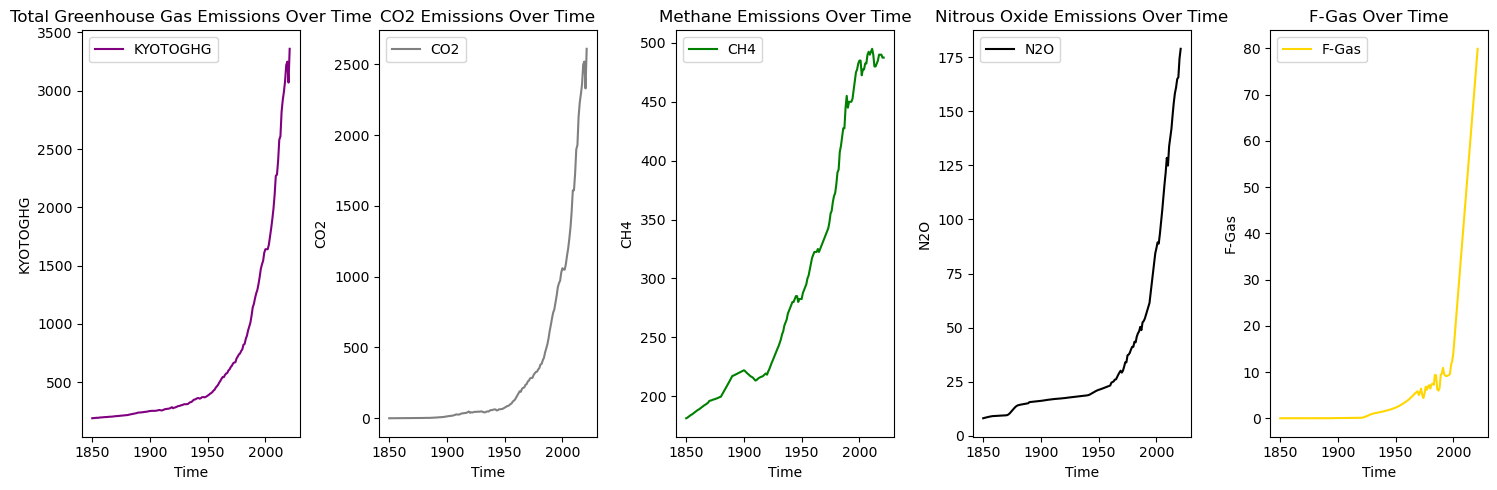

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))

# Plot 'precip' with a scatter plot in the first subplot
sns.lineplot(x=df['Time'], y=df['KYOTOGHG'], ax=axes[0], color='purple', label='KYOTOGHG')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('KYOTOGHG')
axes[0].set_title('Total Greenhouse Gas Emissions Over Time')
axes[0].legend()

# Plot 'temp' in the second subplot
axes[1].plot(df['Time'], df['CO2'], label='CO2', color='grey')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('CO2')
axes[1].set_title('CO2 Emissions Over Time')
axes[1].legend()

# Plot 'carbon' in the third subplot
axes[2].plot(df['Time'], df['CH4'], label='CH4', color='green')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('CH4')
axes[2].set_title('Methane Emissions Over Time')
axes[2].legend()

axes[3].plot(df['Time'], df['N2O'], label='N2O', color='black')
axes[3].set_xlabel('Time')
axes[3].set_ylabel('N2O')
axes[3].set_title('Nitrous Oxide Emissions Over Time')
axes[3].legend()

axes[4].plot(df['Time'], df['F-Gas'], label='F-Gas', color='gold')
axes[4].set_xlabel('Time')
axes[4].set_ylabel('F-Gas')
axes[4].set_title('F-Gas Over Time')
axes[4].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

Here, it is evident that all greenhouse gases have increased dramatically. 

Interestingly, the dip in CO2 emissions due to COVID-19 recovered surprisingly quickly.

Furthermore, CO2 was the only gas that experienced a dip due to COVID-19.

Methane emissions growth rate seem to maybe stabalising after experiencing a shakey period. 

Nitrous oxide and F-Gas have, visually, experienced the highest rate of growth with little fluctuation. 

<Axes: xlabel='Time', ylabel='N2O'>

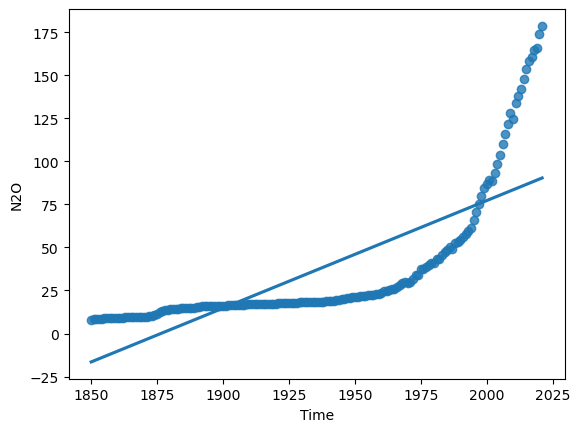

In [14]:
sns.regplot(x='Time', y='N2O', data=df, ci=None)

# The Energy Capacity Dataset - Our World In Data

### Incorporating Fossil Fuel Data

Now that the emissions dataset has been sourced, validated, and presented (without any significant discrepancies), we will now incorporate a fossil fuels timeseries dataset for analysis.

In [15]:
# To predict emissions, need to tie energy mix to emissions

In [16]:
file_name = '/Users/samuel/Pictures/Climate Data/Verifying_Emissions/India/India_energy-consumption-by-source-and-country.csv'

dfi = pd.read_csv(file_name)

print(dfi)

   Entity Code  Year  \
0   India  IND  1965   
1   India  IND  1966   
2   India  IND  1967   
3   India  IND  1968   
4   India  IND  1969   
5   India  IND  1970   
6   India  IND  1971   
7   India  IND  1972   
8   India  IND  1973   
9   India  IND  1974   
10  India  IND  1975   
11  India  IND  1976   
12  India  IND  1977   
13  India  IND  1978   
14  India  IND  1979   
15  India  IND  1980   
16  India  IND  1981   
17  India  IND  1982   
18  India  IND  1983   
19  India  IND  1984   
20  India  IND  1985   
21  India  IND  1986   
22  India  IND  1987   
23  India  IND  1988   
24  India  IND  1989   
25  India  IND  1990   
26  India  IND  1991   
27  India  IND  1992   
28  India  IND  1993   
29  India  IND  1994   
30  India  IND  1995   
31  India  IND  1996   
32  India  IND  1997   
33  India  IND  1998   
34  India  IND  1999   
35  India  IND  2000   
36  India  IND  2001   
37  India  IND  2002   
38  India  IND  2003   
39  India  IND  2004   
40  India  IND  

In [17]:
dfi.head(20)

,Entity,Code,Year,Other renewables (including geothermal and biomass) - TWh,Biofuels consumption - TWh,Solar consumption - TWh,Wind consumption - TWh,Hydro consumption - TWh,Nuclear consumption - TWh,Gas consumption - TWh,Coal consumption - TWh,Oil consumption - TWh
0,India,IND,1965,NaN,NaN,NaN,0.0,56.676430,0.000000,2.372520,413.40735,146.99513
1,India,IND,1966,NaN,NaN,NaN,0.0,59.185505,0.000000,2.663270,412.41534,164.14967
2,India,IND,1967,NaN,NaN,NaN,0.0,66.229225,0.000000,3.558780,419.28525,169.36021
3,India,IND,1968,NaN,NaN,NaN,0.0,76.435425,0.000000,3.954200,433.82470,189.77089
4,India,IND,1969,NaN,NaN,NaN,0.0,84.864360,2.056579,4.745040,460.84120,227.92883
5,India,IND,1970,NaN,NaN,NaN,0.0,90.000130,3.711873,6.328466,436.80887,226.89145
6,India,IND,1971,0.0,NaN,0.0,0.0,98.716570,2.758825,6.706219,442.87220,243.33246
7,India,IND,1972,0.0,NaN,0.0,0.0,95.815440,2.620884,7.355906,467.68307,262.38324
8,India,IND,1973,0.0,NaN,0.0,0.0,102.035866,5.542730,7.336657,461.44937,276.95908
9,India,IND,1974,0.0,NaN,0.0,0.0,98.180770,5.103826,8.303968,520.85610,271.54297


For simplification, we will alter the header labels. 

For reference: 

All values for each fuel is measured in TWh for consumption. These values (assumed) to do not include fuel that has been exported >> *check*

Other Renewables: Renewables including geothermal and biomass. 

In [18]:
# Checking energy mix data contains appropriate value types
dfi.dtypes

Entity                                                        object
Code                                                          object
Year                                                           int64
Other renewables (including geothermal and biomass) - TWh    float64
Biofuels consumption - TWh                                   float64
Solar consumption - TWh                                      float64
Wind consumption - TWh                                       float64
Hydro consumption - TWh                                      float64
Nuclear consumption - TWh                                    float64
Gas consumption - TWh                                        float64
Coal consumption - TWh                                       float64
Oil consumption - TWh                                        float64
dtype: object

In [19]:
# Dropping 'entity' and 'code' columns for simplification
# We know the country we are studying is India
dfi.drop('Entity', axis=1, inplace = True)
dfi.drop('Code', axis=1, inplace=True)

In [20]:
dfi.head()

,Year,Other renewables (including geothermal and biomass) - TWh,Biofuels consumption - TWh,Solar consumption - TWh,Wind consumption - TWh,Hydro consumption - TWh,Nuclear consumption - TWh,Gas consumption - TWh,Coal consumption - TWh,Oil consumption - TWh
0,1965,NaN,NaN,NaN,0.0,56.676430,0.000000,2.37252,413.40735,146.99513
1,1966,NaN,NaN,NaN,0.0,59.185505,0.000000,2.66327,412.41534,164.14967
2,1967,NaN,NaN,NaN,0.0,66.229225,0.000000,3.55878,419.28525,169.36021
3,1968,NaN,NaN,NaN,0.0,76.435425,0.000000,3.95420,433.82470,189.77089
4,1969,NaN,NaN,NaN,0.0,84.864360,2.056579,4.74504,460.84120,227.92883


In [21]:
# Renaming all columns for simplification

df_i = dfi.rename(columns={'Year ': 'Year',
                           'Other renewables (including geothermal and biomass) - TWh':'Other Renewables',
                           'Biofuels consumption - TWh':'Biofuels',
                           'Solar consumption - TWh':'Solar',
                           'Wind consumption - TWh':'Wind',
                           'Hydro consumption - TWh': 'Hydro',
                           'Nuclear consumption - TWh': 'Nuclear',
                           'Gas consumption - TWh': 'Gas',
                           'Coal consumption - TWh': 'Coal',
                           'Oil consumption - TWh': 'Oil'})

df_i.head()

,Year,Other Renewables,Biofuels,Solar,Wind,Hydro,Nuclear,Gas,Coal,Oil
0,1965,NaN,NaN,NaN,0.0,56.676430,0.000000,2.37252,413.40735,146.99513
1,1966,NaN,NaN,NaN,0.0,59.185505,0.000000,2.66327,412.41534,164.14967
2,1967,NaN,NaN,NaN,0.0,66.229225,0.000000,3.55878,419.28525,169.36021
3,1968,NaN,NaN,NaN,0.0,76.435425,0.000000,3.95420,433.82470,189.77089
4,1969,NaN,NaN,NaN,0.0,84.864360,2.056579,4.74504,460.84120,227.92883


In [22]:
# Checking where NaN starts for each column for replacement for '0.00'

df_i.head(26)

,Year,Other Renewables,Biofuels,Solar,Wind,Hydro,Nuclear,Gas,Coal,Oil
0,1965,NaN,NaN,NaN,0.000000,56.676430,0.000000,2.372520,413.40735,146.99513
1,1966,NaN,NaN,NaN,0.000000,59.185505,0.000000,2.663270,412.41534,164.14967
2,1967,NaN,NaN,NaN,0.000000,66.229225,0.000000,3.558780,419.28525,169.36021
3,1968,NaN,NaN,NaN,0.000000,76.435425,0.000000,3.954200,433.82470,189.77089
4,1969,NaN,NaN,NaN,0.000000,84.864360,2.056579,4.745040,460.84120,227.92883
5,1970,NaN,NaN,NaN,0.000000,90.000130,3.711873,6.328466,436.80887,226.89145
6,1971,0.000000,NaN,0.0,0.000000,98.716570,2.758825,6.706219,442.87220,243.33246
7,1972,0.000000,NaN,0.0,0.000000,95.815440,2.620884,7.355906,467.68307,262.38324
8,1973,0.000000,NaN,0.0,0.000000,102.035866,5.542730,7.336657,461.44937,276.95908
9,1974,0.000000,NaN,0.0,0.000000,98.180770,5.103826,8.303968,520.85610,271.54297


In [23]:
# Number of 'NaN''s spotted in data

print("number of NaN values for the Other Renewables column :", df_i['Other Renewables'].isnull().sum())
print("number of NaN values for the Biofuels column :", df_i['Biofuels'].isnull().sum())
print("number of NaN values for the Solar column :", df_i['Solar'].isnull().sum())
print("number of NaN values for the Wind column :", df_i['Wind'].isnull().sum())
print("number of NaN values for the Hydro column :", df_i['Hydro'].isnull().sum())
print("number of NaN values for the Nuclear column :", df_i['Nuclear'].isnull().sum())
print("number of NaN values for the Gas column :", df_i['Gas'].isnull().sum())
print("number of NaN values for the Coal column :", df_i['Coal'].isnull().sum())
print("number of NaN values for the Oil column :", df_i['Oil'].isnull().sum())

number of NaN values for the Other Renewables column : 6
number of NaN values for the Biofuels column : 34
number of NaN values for the Solar column : 6
number of NaN values for the Wind column : 0
number of NaN values for the Hydro column : 0
number of NaN values for the Nuclear column : 0
number of NaN values for the Gas column : 0
number of NaN values for the Coal column : 0
number of NaN values for the Oil column : 0


In [24]:
# Cleaning up data to replace and remove NaN's

df_i['Other Renewables'].replace(np.nan,'0.00', inplace=True)
df_i['Biofuels'].replace(np.nan, '0.00', inplace=True)
df_i['Solar'].replace(np.nan, '0.00', inplace=True)

# From printed dataframe at import data stage, NaN's went up to row 33 for solar
df_i.head(35)

,Year,Other Renewables,Biofuels,Solar,Wind,Hydro,Nuclear,Gas,Coal,Oil
0,1965,0.00,0.00,0.00,0.000000,56.676430,0.000000,2.372520,413.40735,146.99513
1,1966,0.00,0.00,0.00,0.000000,59.185505,0.000000,2.663270,412.41534,164.14967
2,1967,0.00,0.00,0.00,0.000000,66.229225,0.000000,3.558780,419.28525,169.36021
3,1968,0.00,0.00,0.00,0.000000,76.435425,0.000000,3.954200,433.82470,189.77089
4,1969,0.00,0.00,0.00,0.000000,84.864360,2.056579,4.745040,460.84120,227.92883
5,1970,0.00,0.00,0.00,0.000000,90.000130,3.711873,6.328466,436.80887,226.89145
6,1971,0.0,0.00,0.0,0.000000,98.716570,2.758825,6.706219,442.87220,243.33246
7,1972,0.0,0.00,0.0,0.000000,95.815440,2.620884,7.355906,467.68307,262.38324
8,1973,0.0,0.00,0.0,0.000000,102.035866,5.542730,7.336657,461.44937,276.95908
9,1974,0.0,0.00,0.0,0.000000,98.180770,5.103826,8.303968,520.85610,271.54297


In [25]:
# After data cleaning, now labelling df_i as dfe, resembling as dataframe[energy]

dfe = df_i
dfe.head()

,Year,Other Renewables,Biofuels,Solar,Wind,Hydro,Nuclear,Gas,Coal,Oil
0,1965,0.00,0.00,0.00,0.0,56.676430,0.000000,2.37252,413.40735,146.99513
1,1966,0.00,0.00,0.00,0.0,59.185505,0.000000,2.66327,412.41534,164.14967
2,1967,0.00,0.00,0.00,0.0,66.229225,0.000000,3.55878,419.28525,169.36021
3,1968,0.00,0.00,0.00,0.0,76.435425,0.000000,3.95420,433.82470,189.77089
4,1969,0.00,0.00,0.00,0.0,84.864360,2.056579,4.74504,460.84120,227.92883


In [26]:
# When creating the for loop for subplotting below, found that the loop would not work due to values being
#    for some of the variables being auto changed to objects. 

dfe.dtypes

Year                  int64
Other Renewables     object
Biofuels             object
Solar                object
Wind                float64
Hydro               float64
Nuclear             float64
Gas                 float64
Coal                float64
Oil                 float64
dtype: object

In [27]:
dfe['Other Renewables'] = dfe['Other Renewables'].astype(float)
dfe['Biofuels'] = dfe['Biofuels'].astype(float)
dfe['Solar'] = dfe['Solar'].astype(float)
dfe.dtypes

Year                  int64
Other Renewables    float64
Biofuels            float64
Solar               float64
Wind                float64
Hydro               float64
Nuclear             float64
Gas                 float64
Coal                float64
Oil                 float64
dtype: object

In [28]:
dfe.describe(include='all')

,Year,Other Renewables,Biofuels,Solar,Wind,Hydro,Nuclear,Gas,Coal,Oil
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,1993.500000,22.236260,5.397693,16.153098,30.626135,222.330515,36.865817,223.015648,1978.623934,1088.168816
std,16.886879,36.751440,8.574044,47.956116,53.668575,107.503869,36.703204,217.415989,1564.334588,824.697077
min,1965.000000,0.000000,0.000000,0.000000,0.000000,56.676430,0.000000,2.372520,412.415340,146.995130
25%,1979.250000,0.000000,0.000000,0.000000,0.000000,145.444887,6.730906,16.343249,635.510895,371.308603
50%,1993.500000,1.009271,0.000000,0.000000,0.449743,205.685640,18.158083,152.620015,1513.456250,780.154750
75%,2007.750000,28.178385,9.652407,0.174483,38.561315,313.545467,53.965552,396.933137,2963.139625,1684.264300
max,2022.000000,130.065460,36.197903,248.089940,182.617190,456.051500,115.569664,620.863900,5581.428700,2791.583500


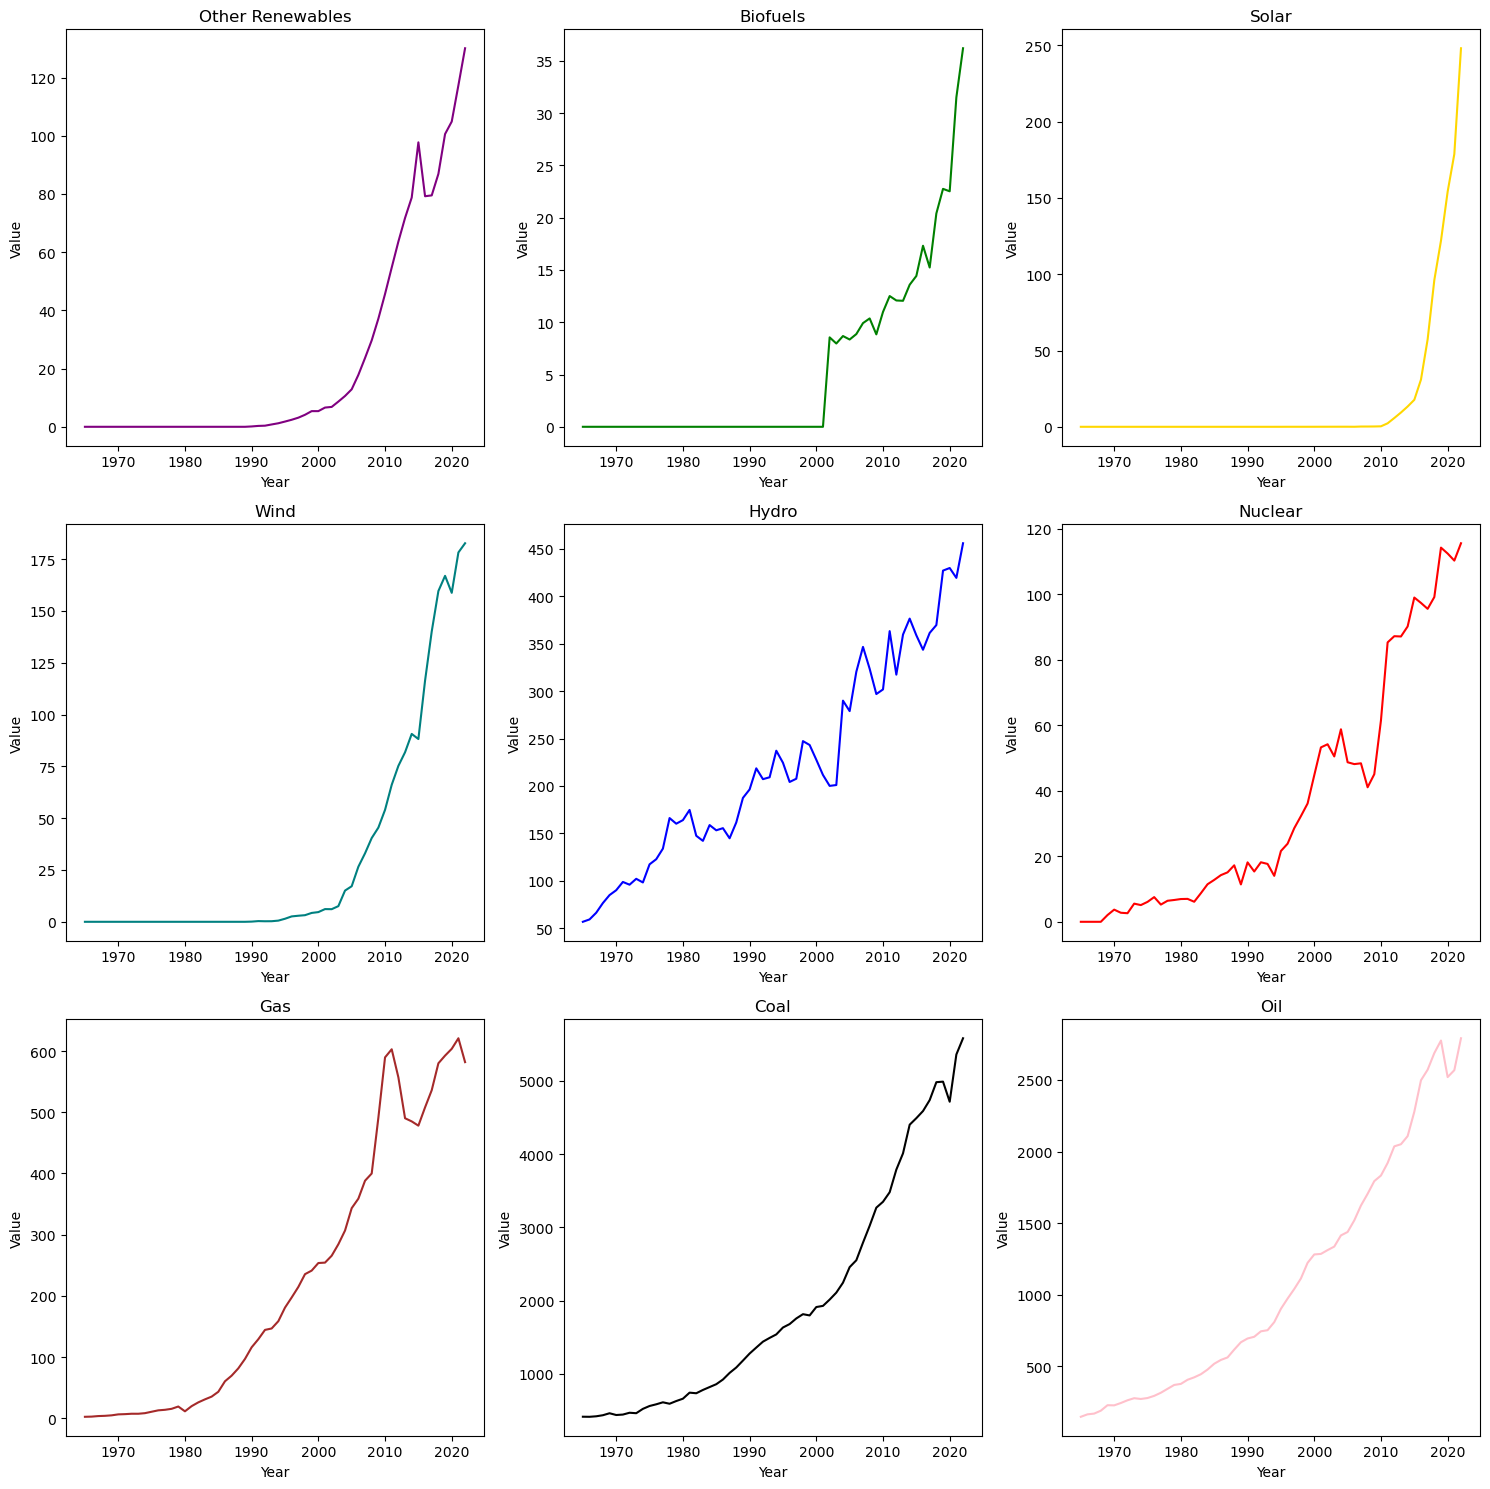

In [29]:
# Creating a for loop for subplotting. All energy variables are plotted against Year.


columns = ['Other Renewables', 'Biofuels', 'Solar', 'Wind', 'Hydro', 'Nuclear', 'Gas', 'Coal', 'Oil']
colors = ['purple', 'green', 'gold', 'teal', 'blue', 'red', 'brown', 'black', 'pink']

# Defining number of rows and columns
num_rows = len(columns) // 3 + (len(columns) % 3 > 0)
num_cols = 3

# Subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

axs = axs.flatten()

for i, column in enumerate(columns):
    axs[i].plot(dfe['Year'], dfe[column], color=colors[i], label=column)
    axs[i].set_title(column)
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Value')

plt.tight_layout()

plt.show()

### Initial Responses to Energy Over Time

- Renewables, early data is not available, so see a sharp initial increase

- Renewables, all energies show a very high rate of increase, but the actual capacity is still very low compared to coal and oil

- Coal and oil seem to be the biggest energy provider in the non-renewables family

- Coal, oil and gas all experienced a dip around 2015 --->> *actually maybe all energy sources had a dip? Why?*



# The Bio-Indicators Dataset

# The Climate Factors Dataset

In [79]:
file_name = '/Users/samuel/Pictures/Climate Data/Verifying_Emissions/India/India_Precip_Temp_MaxTemp.csv'

df = pd.read_csv(file_name)

print(df)

  code   name  Cfactor  1950-01  1950-02  1950-03  1950-04  1950-05  1950-06  \
0  IND  India   precip    23.26    31.07    72.43    25.00    59.12   142.88   
1  IND  India     temp    17.73    18.08    21.34    26.66    29.49    28.83   
2  IND  India  maxtemp    24.50    24.85    27.82    33.71    35.87    33.84   

   1950-07  ...  2020-03  2020-04  2020-05  2020-06  2020-07  2020-08  \
0   358.46  ...    38.87    38.72    59.63   201.10   270.53   331.75   
1    25.34  ...    23.33    27.66    29.83    28.25    27.61    26.86   
2    28.54  ...    29.33    33.94    35.74    32.52    31.24    30.00   

   2020-09  2020-10  2020-11  2020-12  
0   183.12    89.87    30.55    24.03  
1    27.02    25.40    20.94    17.74  
2    31.06    30.88    27.37    24.42  

[3 rows x 855 columns]


In [80]:
df.head()

,code,name,Cfactor,1950-01,1950-02,1950-03,1950-04,1950-05,1950-06,1950-07,...,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12
0,IND,India,precip,23.26,31.07,72.43,25.00,59.12,142.88,358.46,...,38.87,38.72,59.63,201.10,270.53,331.75,183.12,89.87,30.55,24.03
1,IND,India,temp,17.73,18.08,21.34,26.66,29.49,28.83,25.34,...,23.33,27.66,29.83,28.25,27.61,26.86,27.02,25.40,20.94,17.74
2,IND,India,maxtemp,24.50,24.85,27.82,33.71,35.87,33.84,28.54,...,29.33,33.94,35.74,32.52,31.24,30.00,31.06,30.88,27.37,24.42


In [81]:
#Transposing the dataframe to make easier for analysis

df = pd.DataFrame(df)
df = df.set_index(['Cfactor']).T
df = df.reset_index()
df = df.rename(columns={'index': 'Year'})
df = df.reset_index(drop=True)
print(df)

Cfactor     Year  precip   temp maxtemp
0           code     IND    IND     IND
1           name   India  India   India
2        1950-01   23.26  17.73    24.5
3        1950-02   31.07  18.08   24.85
4        1950-03   72.43  21.34   27.82
..           ...     ...    ...     ...
849      2020-08  331.75  26.86    30.0
850      2020-09  183.12  27.02   31.06
851      2020-10   89.87   25.4   30.88
852      2020-11   30.55  20.94   27.37
853      2020-12   24.03  17.74   24.42

[854 rows x 4 columns]


In [82]:
df.head()

Cfactor,Year,precip,temp,maxtemp
0,code,IND,IND,IND
1,name,India,India,India
2,1950-01,23.26,17.73,24.5
3,1950-02,31.07,18.08,24.85
4,1950-03,72.43,21.34,27.82


In [87]:
df = df.drop([0, 1])

df = df.reset_index(drop=True)

df.head()

Cfactor,Year,precip,temp,maxtemp
0,1950-03,72.43,21.34,27.82
1,1950-04,25.0,26.66,33.71
2,1950-05,59.12,29.49,35.87
3,1950-06,142.88,28.83,33.84
4,1950-07,358.46,25.34,28.54


In [ ]:
df.rename('columns='{'Year ': 'Year',
                     'precip ': 'Precipitation'
                     'temp ': 'Temperature'